# 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Write Function

In [4]:
def FindR(X, Y):
    fraction = ((X - X.mean())*(Y - Y.mean())).sum()
    denorminator = np.sqrt(((X - X.mean())**2).sum()*((Y - Y.mean())**2).sum())
    r = fraction/denorminator
    return r

In [3]:
def FindAB(X, Y, X2, XY):
    denorminator = X2.mean() - (X.mean())**2
    a = (XY.mean() - X.mean()*Y.mean())/denorminator
    b = (X2.mean()*Y.mean() - X.mean()*XY.mean())/denorminator
    return a, b

In [38]:
def FindYhat(a, X, b):
    Yhat = a*X + b
    return Yhat

In [6]:
def FindError(Y, Yhat):
    Error = ((Y - Yhat)**2).sum()
    return Error

# 3. Import Data & Prepare Data

# Example 1 Import & Prepare

In [26]:
Data1 = pd.read_csv('w1_ex1.csv')

In [27]:
Data1

,Unnamed: 0,x,y
0,0,0.0,1.0
1,1,0.1,1.2
2,2,0.2,1.4
3,3,0.3,1.6
4,4,0.4,1.8
5,5,0.5,2.0
6,6,0.6,2.2
7,7,0.7,2.4
8,8,0.8,2.6
9,9,0.9,2.8


In [28]:
DataMatrix1 = Data1.as_matrix()

In [29]:
DataMatrix1

array([[  0. ,   0. ,   1. ],
       [  1. ,   0.1,   1.2],
       [  2. ,   0.2,   1.4],
       [  3. ,   0.3,   1.6],
       [  4. ,   0.4,   1.8],
       [  5. ,   0.5,   2. ],
       [  6. ,   0.6,   2.2],
       [  7. ,   0.7,   2.4],
       [  8. ,   0.8,   2.6],
       [  9. ,   0.9,   2.8],
       [ 10. ,   1. ,   3. ],
       [ 11. ,   1.1,   3.2],
       [ 12. ,   1.2,   3.4],
       [ 13. ,   1.3,   3.6],
       [ 14. ,   1.4,   3.8],
       [ 15. ,   1.5,   4. ],
       [ 16. ,   1.6,   4.2],
       [ 17. ,   1.7,   4.4],
       [ 18. ,   1.8,   4.6],
       [ 19. ,   1.9,   4.8],
       [ 20. ,   2. ,   5. ],
       [ 21. ,   2.1,   5.2],
       [ 22. ,   2.2,   5.4],
       [ 23. ,   2.3,   5.6],
       [ 24. ,   2.4,   5.8],
       [ 25. ,   2.5,   6. ],
       [ 26. ,   2.6,   6.2],
       [ 27. ,   2.7,   6.4],
       [ 28. ,   2.8,   6.6],
       [ 29. ,   2.9,   6.8],
       [ 30. ,   3. ,   7. ],
       [ 31. ,   3.1,   7.2],
       [ 32. ,   3.2,   7.4],
       [ 3

In [34]:
X1 = DataMatrix1[:, 1:2]
Y1 = DataMatrix1[:, 2:3]

In [35]:
X1.shape

(100, 1)

In [36]:
XTrain1 = X1[:70, :]
YTrain1 = Y1[:70, :]

XTest1 = X1[70:, :]
YTest1 = Y1[70:, :]

In [48]:
r1 = FindR(X1, Y1)

In [49]:
r1

1.0

# Example 1 Create Model

In [39]:
a1, b1 = FindAB(XTrain1, YTrain1, XTrain1**2, XTrain1*YTrain1)
YhatTrain1 = FindYhat(a1, XTrain1, b1)
ErrorTrain1 = FindError(YTrain1, YhatTrain1)

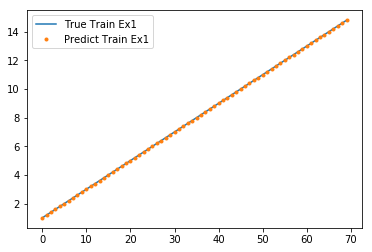

In [42]:
plt.plot(YTrain1, label='True Train Ex1')
plt.plot(YhatTrain1, '.', label='Predict Train Ex1')
plt.legend()

In [43]:
ErrorTrain1

4.3567801719224956e-27

# Example 1 Make Predictions

In [44]:
YhatTest1 = FindYhat(a1, XTest1, b1)
ErrorTest1 = FindError(YTest1, YhatTest1)

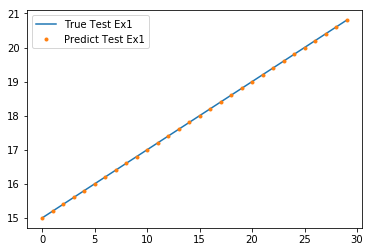

In [47]:
plt.plot(YTest1, label='True Test Ex1')
plt.plot(YhatTest1, '.', label='Predict Test Ex1')
plt.legend()

# Example 2 Import & Prepare Data

In [50]:
Data2 = pd.read_csv('w1_ex2.csv')

In [51]:
Data2

,Unnamed: 0,x,y
0,0,0.0,1.000000
1,1,0.1,1.071773
2,2,0.2,1.148698
3,3,0.3,1.231144
4,4,0.4,1.319508
5,5,0.5,1.414214
6,6,0.6,1.515717
7,7,0.7,1.624505
8,8,0.8,1.741101
9,9,0.9,1.866066


In [52]:
DataMatrix2 = Data2.as_matrix()

In [53]:
DataMatrix2

array([[  0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   1.00000000e-01,   1.07177346e+00],
       [  2.00000000e+00,   2.00000000e-01,   1.14869835e+00],
       [  3.00000000e+00,   3.00000000e-01,   1.23114441e+00],
       [  4.00000000e+00,   4.00000000e-01,   1.31950791e+00],
       [  5.00000000e+00,   5.00000000e-01,   1.41421356e+00],
       [  6.00000000e+00,   6.00000000e-01,   1.51571657e+00],
       [  7.00000000e+00,   7.00000000e-01,   1.62450479e+00],
       [  8.00000000e+00,   8.00000000e-01,   1.74110113e+00],
       [  9.00000000e+00,   9.00000000e-01,   1.86606598e+00],
       [  1.00000000e+01,   1.00000000e+00,   2.00000000e+00],
       [  1.10000000e+01,   1.10000000e+00,   2.14354693e+00],
       [  1.20000000e+01,   1.20000000e+00,   2.29739671e+00],
       [  1.30000000e+01,   1.30000000e+00,   2.46228883e+00],
       [  1.40000000e+01,   1.40000000e+00,   2.63901582e+00],
       [  1.50000000e+01,   1.50000000e+00,   2.8284271

In [55]:
X2 = DataMatrix2[:, 1:2]
Y2 = DataMatrix2[:, 2:3]

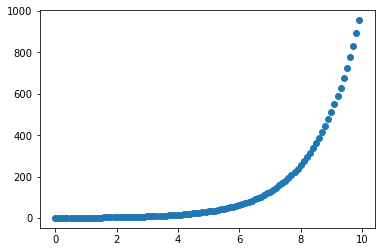

In [60]:
plt.scatter(X2, Y2)

In [61]:
r2 = FindR(X2, Y2)

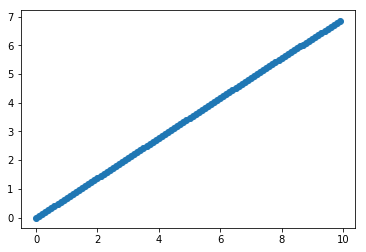

In [63]:
plt.scatter(X2, np.log(Y2))

In [64]:
r2 = FindR(X2, np.log(Y2))

In [65]:
r2

1.0000000000000002

In [66]:
XTrain2 = X2[:70, :]
YTrain2 = Y2[:70, :]

XTest2 = X2[70:, :]
YTest2 = Y2[70:, :]

# Example 2 Create Model

In [69]:
a2, b2 = FindAB(XTrain2, np.log(YTrain2), XTrain2**2, XTrain2*np.log(YTrain2))
YhatTrain2 = FindYhat(a2, XTrain2, b2)
ErrorTrain2 = FindError(np.log(YTrain2), YhatTrain2)

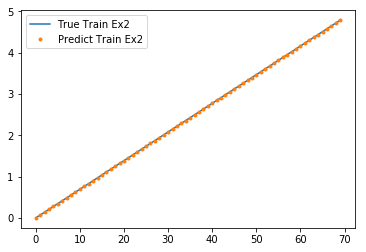

In [71]:
plt.plot(np.log(YTrain2), label='True Train Ex2')
plt.plot(YhatTrain2, '.', label='Predict Train Ex2')
plt.legend()

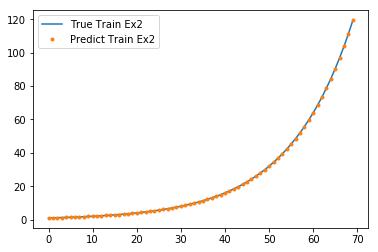

In [73]:
plt.plot(YTrain2, label='True Train Ex2')
plt.plot(np.exp(YhatTrain2), '.', label='Predict Train Ex2')
plt.legend()

# Example 3 Import & Prepare Data

In [75]:
Data3 = pd.read_csv('w1_ex3.csv')

In [76]:
Data3

,Unnamed: 0,x,y
0,0,0.0,0.000000
1,1,0.1,0.099833
2,2,0.2,0.198669
3,3,0.3,0.295520
4,4,0.4,0.389418
5,5,0.5,0.479426
6,6,0.6,0.564642
7,7,0.7,0.644218
8,8,0.8,0.717356
9,9,0.9,0.783327


In [77]:
DataMatrix3 = Data3.as_matrix()

In [78]:
DataMatrix3

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   1.00000000e-01,   9.98334166e-02],
       [  2.00000000e+00,   2.00000000e-01,   1.98669331e-01],
       [  3.00000000e+00,   3.00000000e-01,   2.95520207e-01],
       [  4.00000000e+00,   4.00000000e-01,   3.89418342e-01],
       [  5.00000000e+00,   5.00000000e-01,   4.79425539e-01],
       [  6.00000000e+00,   6.00000000e-01,   5.64642473e-01],
       [  7.00000000e+00,   7.00000000e-01,   6.44217687e-01],
       [  8.00000000e+00,   8.00000000e-01,   7.17356091e-01],
       [  9.00000000e+00,   9.00000000e-01,   7.83326910e-01],
       [  1.00000000e+01,   1.00000000e+00,   8.41470985e-01],
       [  1.10000000e+01,   1.10000000e+00,   8.91207360e-01],
       [  1.20000000e+01,   1.20000000e+00,   9.32039086e-01],
       [  1.30000000e+01,   1.30000000e+00,   9.63558185e-01],
       [  1.40000000e+01,   1.40000000e+00,   9.85449730e-01],
       [  1.50000000e+01,   1.50000000e+00,   9.9749498

In [79]:
X3 = DataMatrix3[:, 1:2]
Y3 = DataMatrix3[:, 2:3]

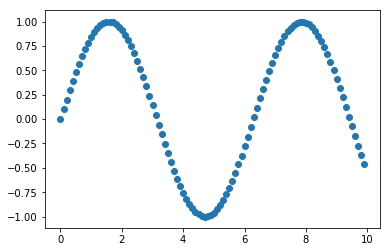

In [83]:
plt.scatter(X3, Y3)

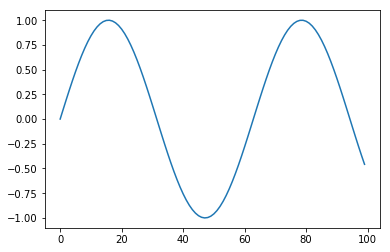

In [82]:
plt.plot(Y3)

In [84]:
r3 = FindR(X3, Y3)

In [85]:
r3

-0.058385132440325165